# Portfolio Assignment: Text Classification 2

Linus Fackler

aa

### Imports

In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from wordcloud import WordCloud, STOPWORDS

## Preprocessing the data

### Read Data

The original dataset contains over 34 million rows, and loading this data always takes an unnecessary amount of time. So instead of loading it and then cutting it down in the notebook, I decided to just edit the CSV files to 75k rows for train and 25k for test, to save time.

It also didn't contain any headers, so I added "is_positive", "title", and "description".

In [42]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')
print("Train:", train.shape)
print("Test:", test.shape)
print("\nTrain types:\n", train.dtypes, sep='')
print("\nTest tytpes:\n", test.dtypes, sep='')
print()
test.head()

Train: (75000, 3)
Test: (25000, 3)

Train types:
is_positive     int64
title          object
review         object
dtype: object

Test tytpes:
is_positive     int64
title          object
review         object
dtype: object



,is_positive,title,review
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


Just to make it less confusing, I will change 2 to 1 and 1 to 0.
Here, 1 is positive and 0 is negative.

In [43]:
# negative -> 0
train.loc[train['is_positive'] == 1, 'is_positive'] = 0
test.loc[test['is_positive'] == 1, 'is_positive'] = 0

# positive -> 1
train.loc[train['is_positive'] == 2, 'is_positive'] = 1
test.loc[test['is_positive'] == 2, 'is_positive'] = 1

In [44]:
test.head()

,is_positive,title,review
0,1,Great CD,My lovely Pat has one of the GREAT voices of h...
1,1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,1,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,1,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


### Distribution of Target Classes

#### Train

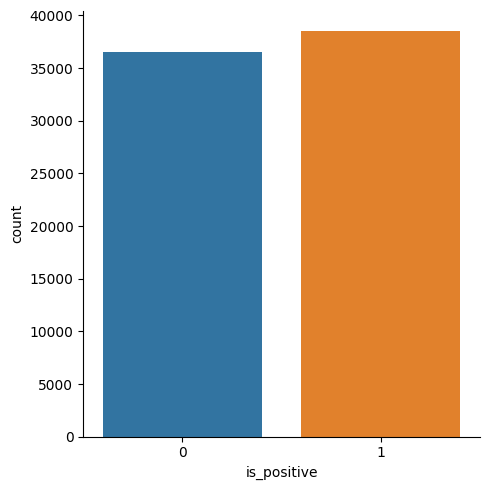

In [46]:
sb.catplot(x='is_positive', kind='count', data=train)

#### Test

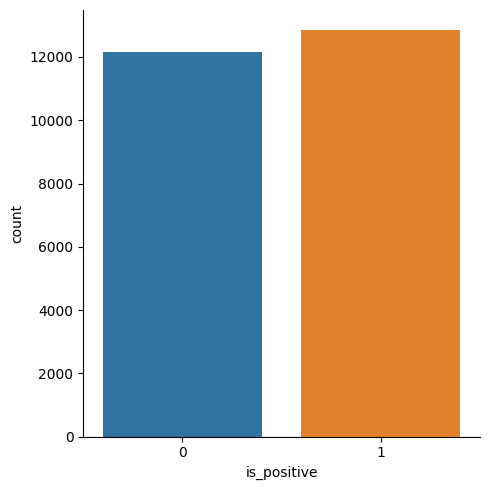

In [47]:
sb.catplot(x='is_positive', kind='count', data=test)

### Visualize most important words

These are the most important words in the reviews of the training data set for each positive and negative reviews.

#### Train - review - positive

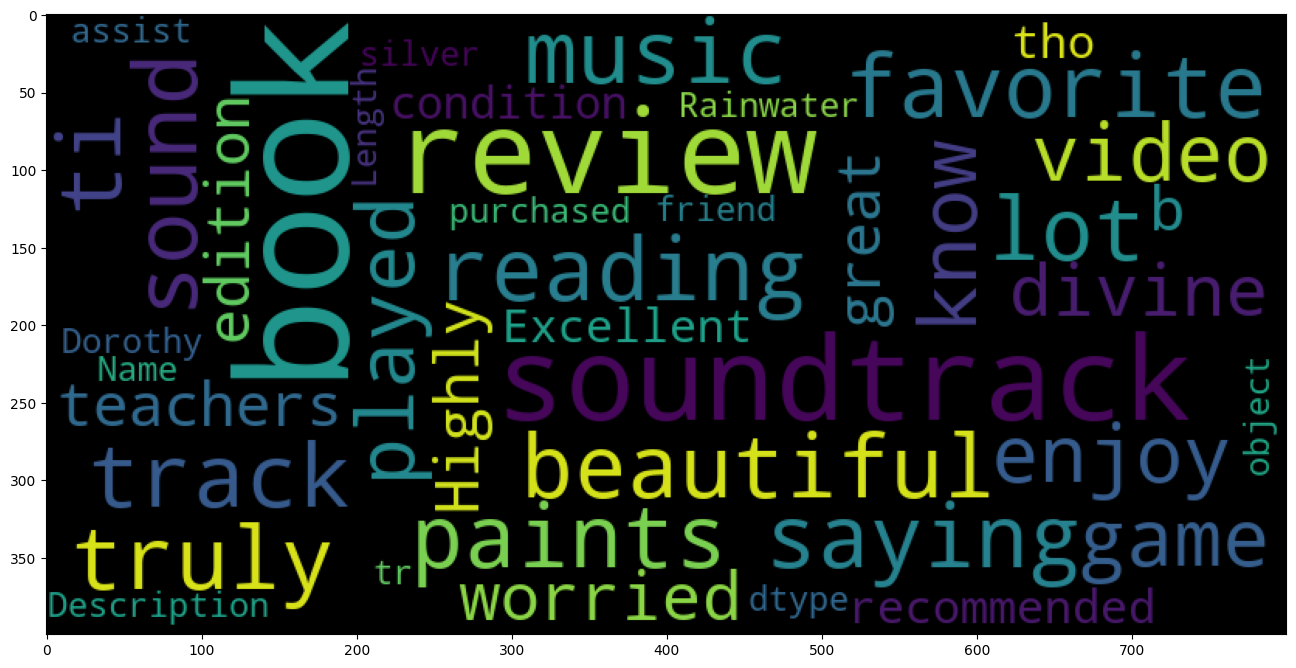

In [48]:
wordcloud = WordCloud(background_color = 'black', stopwords = STOPWORDS, max_words = 100, max_font_size = 100, random_state = 15, width = 800, height = 400)

plt.figure(figsize = (16, 12))
wordcloud.generate(str(train.loc[train['is_positive'] == 1, 'review']))
plt.imshow(wordcloud)

#### Train - review - negative

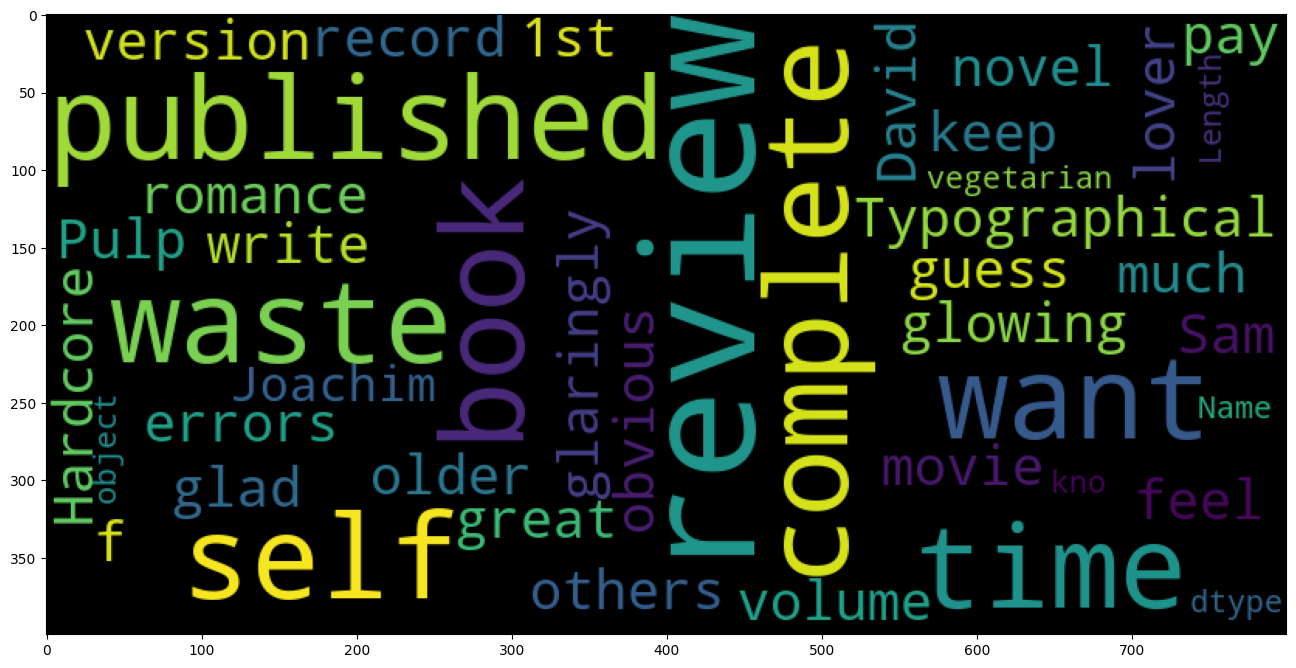

In [49]:
wordcloud = WordCloud(background_color = 'black', stopwords = STOPWORDS, max_words = 100, max_font_size = 100, random_state = 15, width = 800, height = 400)

plt.figure(figsize = (16, 12))
wordcloud.generate(str(train.loc[train['is_positive'] == 0, 'review']))
plt.imshow(wordcloud)

### Train - title - positive

Since the review itself might contain less of the words that people instantly associate with a positive or negative review, here are the most important words from the title, which mostly already contain only a few words.

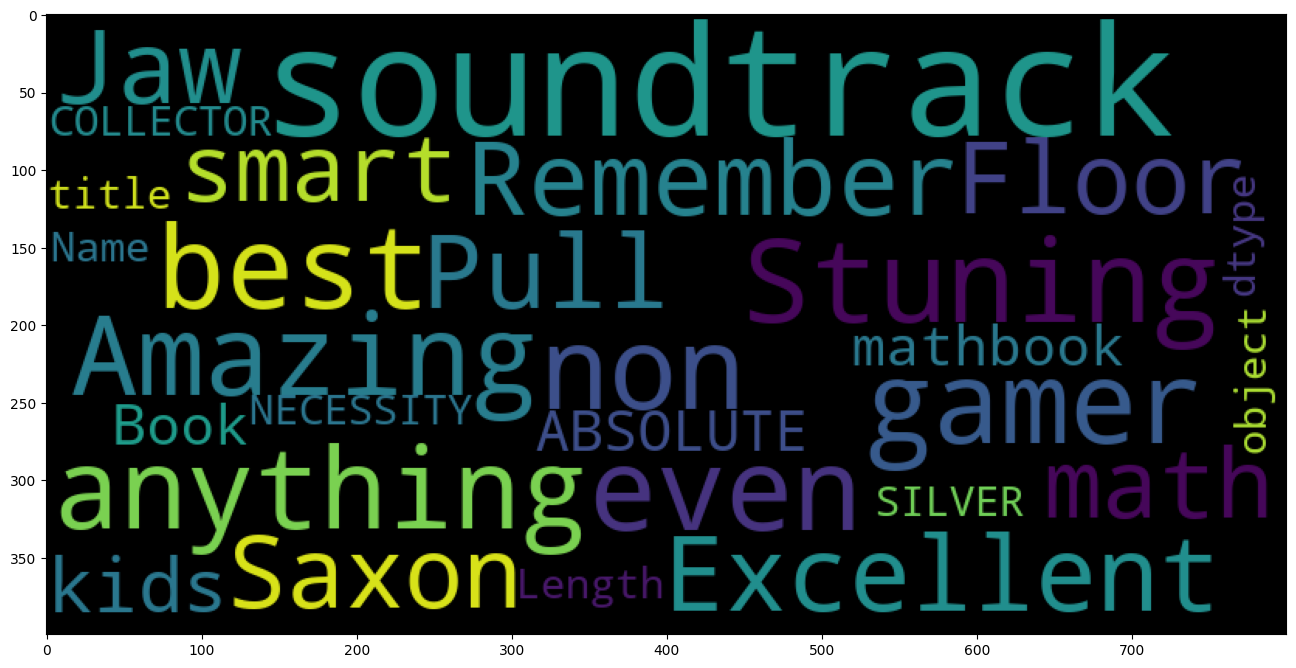

In [51]:
wordcloud = WordCloud(background_color = 'black', stopwords = STOPWORDS, max_words = 100, max_font_size = 100, random_state = 15, width = 800, height = 400)

plt.figure(figsize = (16, 12))
wordcloud.generate(str(train.loc[train['is_positive'] == 1, 'title']))
plt.imshow(wordcloud)

### Train - title - negative

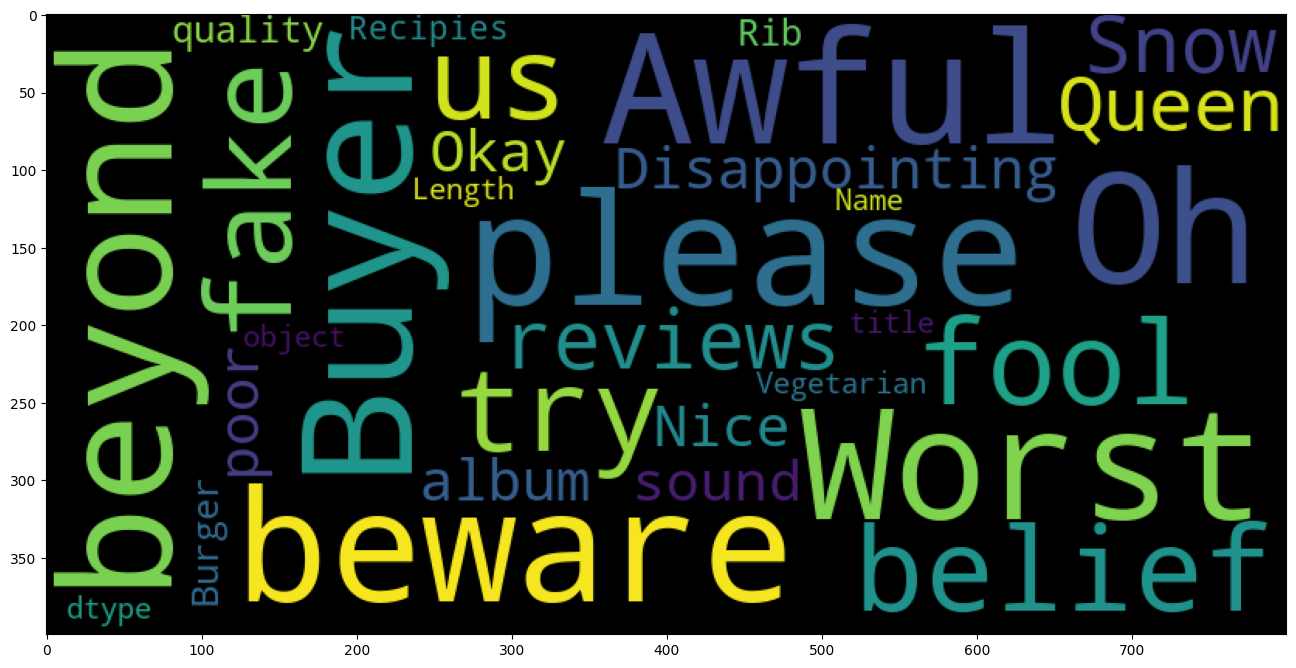

In [50]:
wordcloud = WordCloud(background_color = 'black', stopwords = STOPWORDS, max_words = 100, max_font_size = 100, random_state = 15, width = 800, height = 400)

plt.figure(figsize = (16, 12))
wordcloud.generate(str(train.loc[train['is_positive'] == 0, 'title']))
plt.imshow(wordcloud)

Here, we can see a clear distinction between positive and negative reviews. These probably make it easier to classify the different reviews, simply because these are very strong and one-sided words.

## What the model should predict

Our goal is to predict whether an amazon review is positive (1) or negative (0), based on the title and review description.